#**Assignment : SVM & Navie bayes**

##**Theory Question Answer**

### Q1: What is a Support Vector Machine (SVM)?

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression.  
It works by finding the optimal hyperplane that best separates data points of different classes with the maximum margin.


### Q2: What is the difference between Hard Margin and Soft Margin SVM?

- **Hard Margin SVM**: Assumes data is linearly separable, no misclassification is allowed. Very strict.  
- **Soft Margin SVM**: Allows some misclassification using a penalty parameter (C). Works better with noisy and non-separable data.


### Q3: What is the mathematical intuition behind SVM?

The intuition is to maximize the margin between classes while minimizing classification errors. Mathematically, SVM solves an optimization problem:

- min 1/2 ||w||^2

 subject to  
- y_i(w* x_i + b) >= 1

Here, \(w\) is the weight vector, \(b\) is the bias, and \(y_i\) are class labels. Maximizing the margin reduces overfitting and improves generalization.


### Q4: What is the role of Lagrange Multipliers in SVM?

Lagrange multipliers are used to convert the constrained optimization problem of SVM into an unconstrained one (dual problem).  
They help enforce constraints while maximizing the margin and identify support vectors (points with non-zero multipliers).


### Q5: What are Support Vectors in SVM?

Support Vectors are the data points that lie closest to the decision boundary (hyperplane).  
They are critical because they define the position and orientation of the hyperplane.  
If you remove them, the decision boundary would change.



### Q6: What is a Support Vector Classifier (SVC)?

A Support Vector Classifier (SVC) is the classification implementation of SVM.  
It tries to find the best hyperplane that separates classes with the maximum margin.  
In scikit-learn, `SVC` is the commonly used class for SVM classification tasks.


### Q7: What is a Support Vector Regressor (SVR)?

Support Vector Regressor (SVR) is the regression version of SVM.  
Instead of maximizing the margin between classes, SVR tries to fit the best line (or hyperplane) within a tolerance margin (epsilon).  
It ignores small errors but penalizes large deviations.


### Q8: What is the Kernel Trick in SVM?

The Kernel Trick allows SVM to solve non-linear classification problems.  
It maps input features into a higher-dimensional space without explicitly computing the transformation.  
This makes it possible to separate classes that are not linearly separable in the original space.


### Q9: Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

- **Linear Kernel**: Works well when data is linearly separable. Simple and fast.  
- **Polynomial Kernel**: Captures polynomial relationships between features. Flexible but can be computationally expensive.  
- **RBF Kernel (Gaussian)**: Most popular; captures complex non-linear relations. Works well in most cases.


### Q10: What is the effect of the C parameter in SVM?

- **Small C**: Allows more misclassification, larger margin → simpler model, less overfitting.  
- **Large C**: Penalizes misclassification heavily, smaller margin → complex model, risk of overfitting.  
C controls the trade-off between margin width and classification accuracy.


### Q11: What is the role of the Gamma parameter in RBF Kernel SVM?

- **Low Gamma**: Points far apart still influence each other → smoother decision boundary.  
- **High Gamma**: Influence of each point is very local → complex boundary, risk of overfitting.  
Gamma defines how far the influence of a single training example reaches.


### Q12: What is the Naïve Bayes classifier, and why is it called "Naïve"?

Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem.  
It assumes features are conditionally independent given the class label.  
It is called "Naïve" because in reality, features are rarely completely independent, but the assumption simplifies computation and works surprisingly well.


### Q12: What is the Naïve Bayes classifier, and why is it called "Naïve"?

Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem.  
It assumes features are conditionally independent given the class label.  
It is called "Naïve" because in reality, features are rarely completely independent, but the assumption simplifies computation and works surprisingly well.


### Q13: What is Bayes’ Theorem?

P(A|B) = {P(B|A) * P(A)} / P(B)

- **P(A|B)**: Probability of event A given B (posterior).  
- **P(B|A)**: Probability of event B given A (likelihood).  
- **P(A)**: Prior probability of A.  
- **P(B)**: Total probability of B.


### Q14: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

- **Gaussian NB**: Assumes features follow a normal (Gaussian) distribution. Used for continuous data.  
- **Multinomial NB**: Assumes features represent counts/frequencies (e.g., word counts). Used in text classification.  
- **Bernoulli NB**: Assumes binary features (0/1, present/absent). Used in document classification with binary word presence.


### Q15: When should you use Gaussian Naïve Bayes over other variants?

Use **Gaussian NB** when features are continuous and approximately normally distributed.  
Examples: sensor data, medical measurements, continuous numerical attributes.


### Q16: What are the key assumptions made by Naïve Bayes?
- All features are **conditionally independent** given the class label.  
- Each feature contributes equally and independently to the probability of a class.  
- No correlation between features is assumed.  


### Q17: What are the advantages and disadvantages of Naïve Bayes?
**Advantages:**  
- Simple, fast, and works well with small datasets.  
- Performs well in text classification problems.  
- Handles both continuous and categorical data.  

**Disadvantages:**  
- Assumption of independence is unrealistic in many real-world datasets.  
- If a categorical variable has a category not seen in training, probability becomes zero (needs smoothing).  
- Can be less accurate compared to more complex models.  


### Q18: Why is Naïve Bayes a good choice for text classification?
- Text data often has a very high-dimensional feature space (many words).  
- Independence assumption works reasonably well in bag-of-words models.  
- Fast training and prediction even with large vocabularies.  
- Performs surprisingly well in spam filtering, sentiment analysis, etc.  


### Q19: Compare SVM and Naïve Bayes for classification tasks
- **SVM**:  
  - Finds the best hyperplane to separate classes.  
  - Works well for high-dimensional but structured data.  
  - Computationally expensive for large datasets.  

- **Naïve Bayes**:  
  - Based on probability and Bayes theorem.  
  - Works very well for text classification.  
  - Simpler, faster, but less accurate if features are correlated.  


### Q20: How does Laplace Smoothing help in Naïve Bayes?
- Prevents zero probability problem when a word/feature doesn’t appear in training data.  
- Adds a small constant (e.g., +1) to frequency counts.  
- Ensures that unseen words still get a small non-zero probability.  


##**Practical Question Answer**

### Q21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print("Accuracy on Iris dataset:", accuracy_score(y_test, y_pred))


Accuracy on Iris dataset: 1.0


### Q22: Train SVM classifiers with Linear and RBF kernels on the Wine dataset and compare accuracies

In [4]:


import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Print accuracies
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


### Q23: Train an SVM Regressor (SVR) on the California Housing dataset and evaluate with MSE



In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 1.3489971413208723


### Q24: Train an SVM Classifier with a Polynomial Kernel and visualize decision boundary

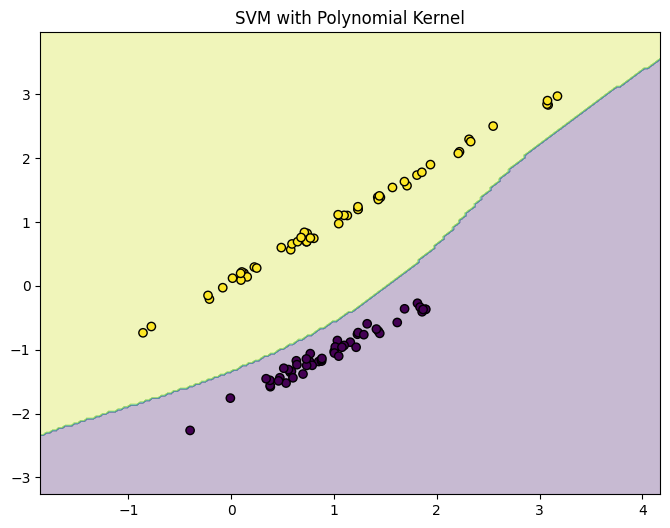

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', marker='o')
plt.title("SVM with Polynomial Kernel")
plt.show()


### Q25: Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.


In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
print("Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))

Accuracy on Breast Cancer dataset: 0.9415204678362573


###Q26: Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
newsgroups = fetch_20newsgroups(subset='all')
X = newsgroups.data
y = newsgroups.target

# Convert text to features
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test)
print("Accuracy on 20 Newsgroups dataset:", accuracy_score(y_test, y_pred))


Accuracy on 20 Newsgroups dataset: 0.8749557835160948


### Q27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually


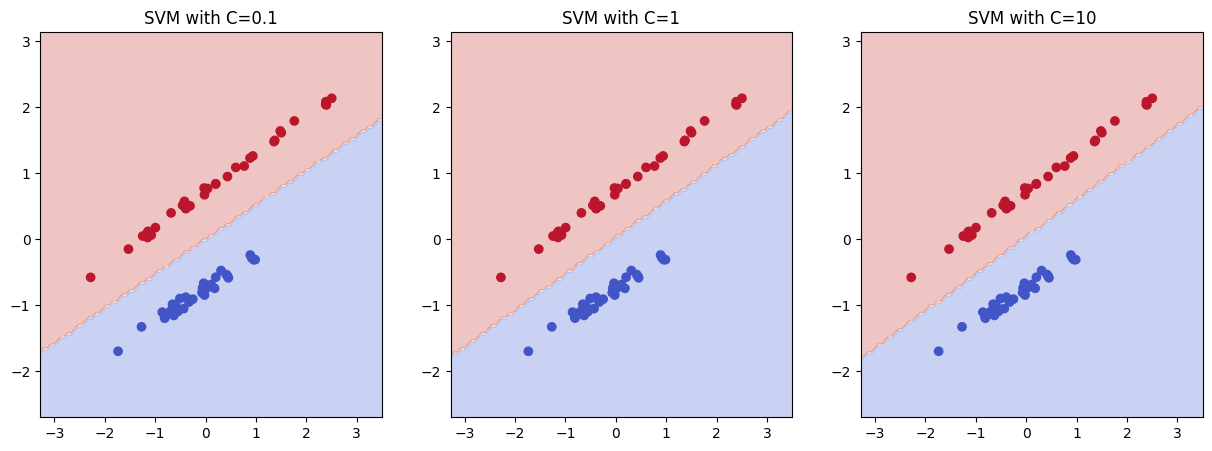

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values, 1):
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)

    # Plot decision boundary
    ax = plt.subplot(1, 3, i)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.title(f"SVM with C={C}")

plt.show()


### Q28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features


In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate binary dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X = (X > 0).astype(int)  # Convert features to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.76


### Q29: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data


In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
model_unscaled = SVC(kernel='rbf')
model_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, model_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test))

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 0.7592592592592593
Accuracy with scaling: 0.3888888888888889


### Q30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing


In [13]:
from sklearn.naive_bayes import GaussianNB

# Train without Laplace Smoothing
model1 = GaussianNB(var_smoothing=1e-9)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

# Train with higher Laplace Smoothing
model2 = GaussianNB(var_smoothing=1e-2)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

print("Predictions without smoothing:", pred1[:10])
print("Predictions with smoothing:", pred2[:10])


Predictions without smoothing: [0 0 2 0 1 0 1 2 1 2]
Predictions with smoothing: [0 0 2 0 1 0 1 2 2 2]


### Q31: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best accuracy: 0.9276666666666668


###Q32: Train an SVM Classifier on an imbalanced dataset and apply class weighting

In [15]:
# Q32: SVM on imbalanced dataset with class weighting

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train without class weights
svm_normal = SVC(kernel='linear')
svm_normal.fit(X_train, y_train)
print("Without class weighting:\n", classification_report(y_test, svm_normal.predict(X_test)))

# Train with class weights
svm_weighted = SVC(kernel='linear', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
print("With class weighting:\n", classification_report(y_test, svm_weighted.predict(X_test)))


Without class weighting:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       529
           1       0.82      0.70      0.76        71

    accuracy                           0.95       600
   macro avg       0.89      0.84      0.86       600
weighted avg       0.94      0.95      0.94       600

With class weighting:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       529
           1       0.56      0.96      0.71        71

    accuracy                           0.91       600
   macro avg       0.78      0.93      0.83       600
weighted avg       0.94      0.91      0.92       600



### Q33: Naïve Bayes classifier for spam detection using email data

In [16]:
# Q33: Naïve Bayes for spam detection

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Sample email dataset
emails = [
    "Win money now", "Claim your free lottery", "Lowest prices for you",
    "Meeting at 10am", "Project deadline tomorrow", "Let’s catch up over lunch"
]
labels = [1, 1, 1, 0, 0, 0]  # 1 = Spam, 0 = Ham

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate
y_pred = nb.predict(X_test)
print("Spam Detection Report:\n", classification_report(y_test, y_pred))


Spam Detection Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



###Q34: Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare accuracy

In [17]:
# Q34: Compare SVM vs Naïve Bayes on same dataset

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Dataset
X, y = make_classification(n_samples=2000, n_features=20, n_classes=2, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))

print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Naïve Bayes Accuracy: {nb_acc:.4f}")


SVM Accuracy: 0.8950
Naïve Bayes Accuracy: 0.8967


###Q35: Perform feature selection before training a Naïve Bayes classifier and compare results

In [20]:
# Q35: Perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without feature selection
clf1 = GaussianNB()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

# With feature selection (top 10 features using ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

clf2 = GaussianNB()
clf2.fit(X_train_sel, y_train)
y_pred2 = clf2.predict(X_test_sel)
acc2 = accuracy_score(y_test, y_pred2)

print("Accuracy without feature selection:", acc1)
print("Accuracy with feature selection:", acc2)


Accuracy without feature selection: 1.0
Accuracy with feature selection: 0.9722222222222222


### Q36: Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) on the Wine dataset

In [21]:
# Q36: SVM OvR vs OvO on Wine dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-vs-Rest
ovr = OneVsRestClassifier(SVC(kernel='linear'))
ovr.fit(X_train, y_train)
ovr_acc = accuracy_score(y_test, ovr.predict(X_test))

# One-vs-One
ovo = OneVsOneClassifier(SVC(kernel='linear'))
ovo.fit(X_train, y_train)
ovo_acc = accuracy_score(y_test, ovo.predict(X_test))

print(f"SVM One-vs-Rest Accuracy: {ovr_acc:.4f}")
print(f"SVM One-vs-One Accuracy: {ovo_acc:.4f}")


SVM One-vs-Rest Accuracy: 0.9815
SVM One-vs-One Accuracy: 0.9815


###Q37: Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare accuracy

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kernels to test
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Kernel: linear, Accuracy: 0.9561
Kernel: poly, Accuracy: 0.9474
Kernel: rbf, Accuracy: 0.9474


###Q38: SVM Classifier using Stratified K-Fold Cross-Validation and compute average accuracy

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# SVM Classifier
clf = SVC(kernel='linear', random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf)

print("Cross-validation accuracies:", scores)
print("Average Accuracy:", scores.mean())


Cross-validation accuracies: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Average Accuracy: 0.9473063188945815


###Q39: Naïve Bayes classifier using different prior probabilities and compare performance

In [24]:
from sklearn.naive_bayes import GaussianNB

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different priors
priors = [None, [0.7, 0.3], [0.5, 0.5]]

for prior in priors:
    clf = GaussianNB(priors=prior)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f"Priors: {prior}, Accuracy: {acc:.4f}")


Priors: None, Accuracy: 0.9737
Priors: [0.7, 0.3], Accuracy: 0.9649
Priors: [0.5, 0.5], Accuracy: 0.9737


###Q40: Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

In [25]:
from sklearn.feature_selection import RFE

# Base SVM
svm = SVC(kernel="linear", random_state=42)

# RFE with 10 features
selector = RFE(svm, n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Train without RFE
svm.fit(X_train, y_train)
acc1 = svm.score(X_test, y_test)

# Train with RFE
svm.fit(X_train_rfe, y_train)
acc2 = svm.score(X_test_rfe, y_test)

print("Accuracy without RFE:", acc1)
print("Accuracy with RFE:", acc2)


Accuracy without RFE: 0.956140350877193
Accuracy with RFE: 0.9736842105263158


###Q41: Train an SVM Classifier and evaluate using Precision, Recall, and F1-Score

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train SVM
clf = SVC(kernel="linear", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-Score: 0.9655172413793104


###Q42: Train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_prob = nb.predict_proba(X_test)

# Log Loss
loss = log_loss(y_test, y_prob)
print("Log Loss (Cross-Entropy Loss):", loss)


Log Loss (Cross-Entropy Loss): 0.2037342715214191


###Q43: Train an SVM Classifier and visualize the Confusion Matrix using seaborn

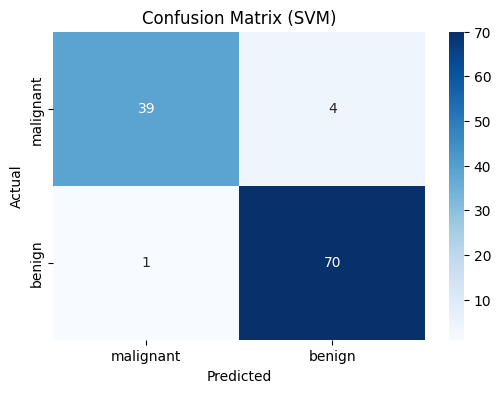

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train SVM
clf = SVC(kernel="linear", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


###Q44: Train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE)

In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_diabetes

# Load regression dataset
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_reg, y_train_reg)
y_pred_reg = svr.predict(X_test_reg)

# MAE
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Mean Absolute Error (SVR):", mae)


Mean Absolute Error (SVR): 56.02372412801096


###Q45: Train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

In [30]:
from sklearn.metrics import roc_auc_score

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_prob = nb.predict_proba(X_test)[:,1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9983622666229938


###Q46: Train an SVM Classifier and visualize the Precision-Recall Curve

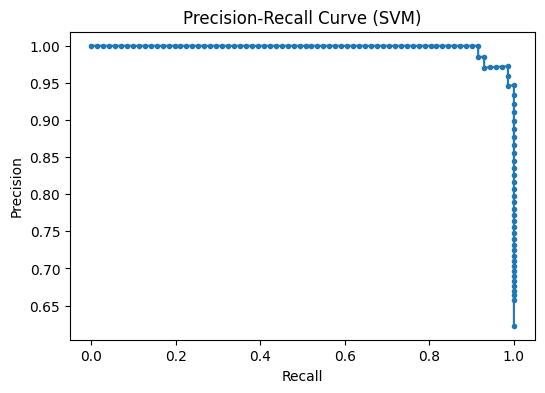

In [31]:
from sklearn.metrics import precision_recall_curve

# Train SVM with probability estimates
clf = SVC(kernel="linear", probability=True, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:,1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SVM)")
plt.show()
